# 🧭 Clustering Analysis on TripAdvisor Reviews (K-Means)

## 📌 Introduction

In this analysis, we applied the **K-Means clustering algorithm** to a dataset of average user reviews on various amenities at resorts across Asia. The objective was to identify distinct groups of user preferences based on their ratings for categories such as juice bars, religious institutions, restaurants, beaches, and cultural venues.

Before applying the model, we standardized the data using `StandardScaler` to ensure that each feature contributed equally to the distance metric used by K-Means. We then trained a KMeans model with 3 clusters and analyzed how resorts grouped based on similar feedback patterns.

To visualize the results, we plotted paired scatter plots of key features to evaluate how clearly the clusters separate in feature space.

Dataset shape: (980, 10)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mean values by cluster:
            Average user feedback on art galleries  \
cluster_km                                           
0                                         0.903473   
1                                         0.882608   
2                                         1.021905   

            Average user feedback on dance clubs  \
cluster_km                                         
0                                       1.442577   
1                                       1.279468   
2                                       1.920000   

            Average user feedback on juice bars  \
cluster_km                                        
0                                      1.765098   
1                                      0.583322   
2                                      0.559048   

            Average user feedback on restaurants  \
cluster_km                                         
0                                       0.566218   
1                               

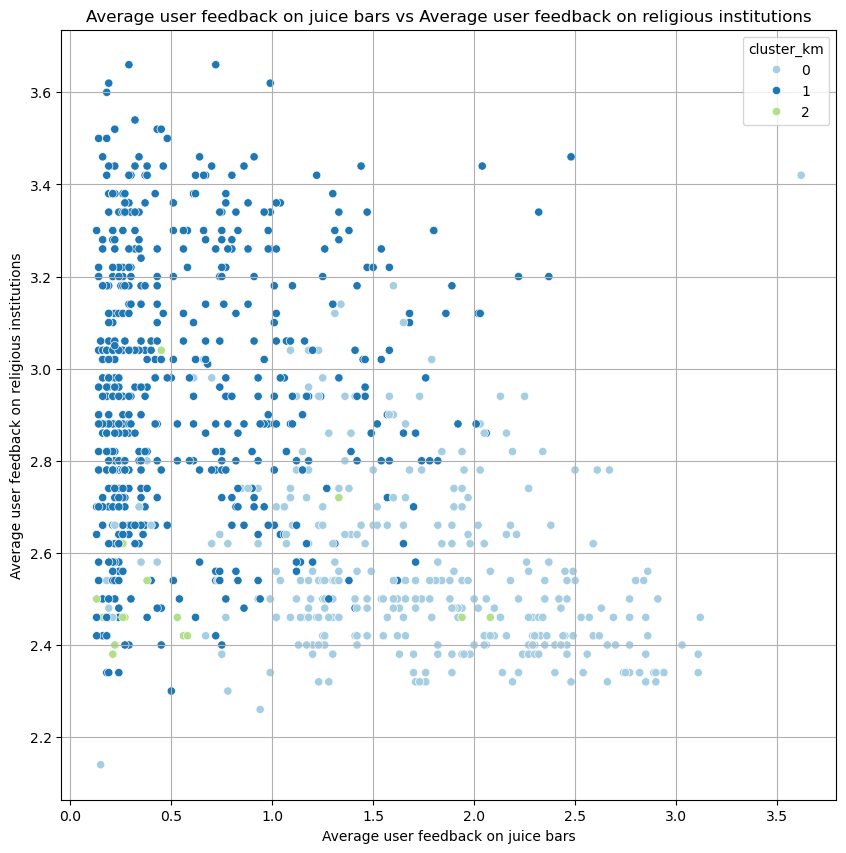

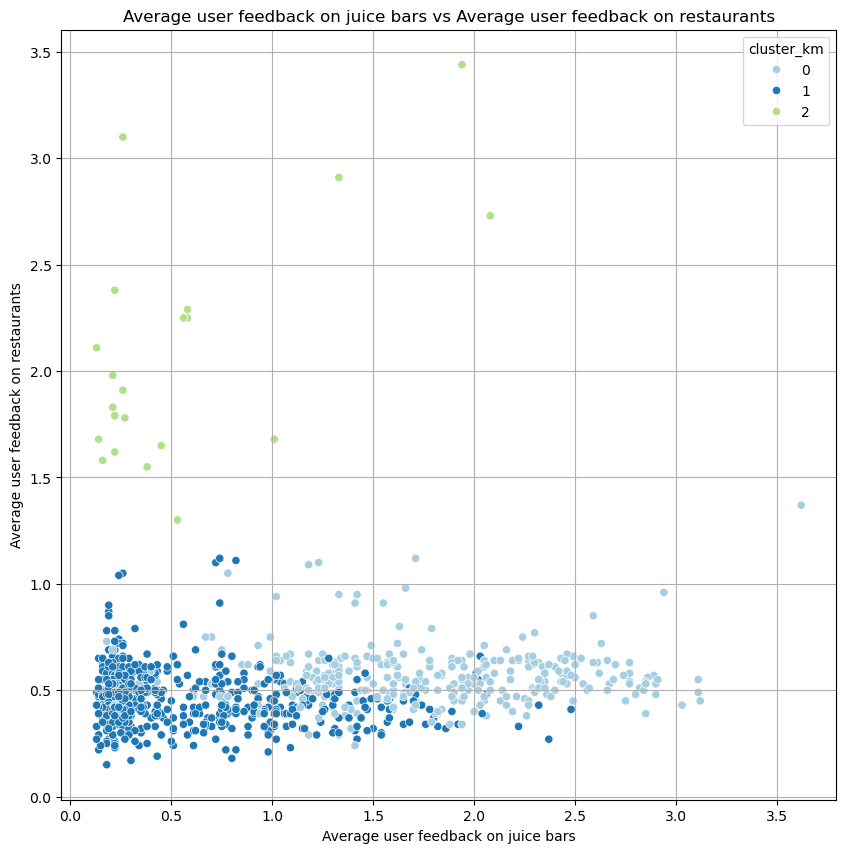

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot paired features colored by cluster
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=df[x_name], y=df[y_name],
                    hue=df[cluster_name], palette='Paired')
    plt.title(f'{x_name} vs {y_name}')
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend(title=cluster_name)
    plt.grid(True)
    plt.show()

# Load the dataset
travel = pd.read_csv('datasets/tripadvisor_review_case_us.csv')
print('Dataset shape:', travel.shape)

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(travel)

# Define the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Predict clusters (algorithm assigns labels 0 to 2)
labels = kmeans.fit_predict(x_scaled)

# Add the cluster labels to the dataset
travel['cluster_km'] = labels

# Compute the mean values of each feature per cluster
cluster_means = travel.groupby('cluster_km').mean()
print('Mean values by cluster:')
print(cluster_means)

# Plot paired features: Juice Bars vs Religious Institutions
show_clusters_on_plot(
    travel,
    'Average user feedback on juice bars',
    'Average user feedback on religious institutions',
    'cluster_km'
)

# Plot paired features: Juice Bars vs Restaurants
show_clusters_on_plot(
    travel,
    'Average user feedback on juice bars',
    'Average user feedback on restaurants',
    'cluster_km'
)

## ✅ Conclusion

The parameters for **juice bars** and **religious institutions** turned out to be **boundary-defining features** for the clusters. As we can see in the paired scatter plot of these two variables, the clusters are well-separated with minimal overlap.

In contrast, the remaining categories — such as **beaches**, **restaurants**, and **cultural venues** — showed **less variation across clusters**. This suggests that, while these amenities are rated similarly by most users, the distinctions in juice bar and religious institution ratings play a critical role in how users segment their experiences at resorts.

This insight can be valuable for travel and hospitality businesses aiming to target different customer segments based on more polarizing preferences.

___

## 🧭 Introduction

In this exercise, we analyze a dataset containing user reviews from TripAdvisor. Our goal is to cluster user feedback about different aspects of resorts in Asia using the K-Means algorithm.

To evaluate the quality of the clustering, we will use the **silhouette score** — a common metric in unsupervised learning that measures how well objects fit within their assigned clusters, compared to other clusters. This score ranges from -1 to 1, where values closer to 1 indicate more clearly defined clusters.

This kind of analysis is often used in business for customer segmentation or product targeting, especially when there are no predefined labels available.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
travel = pd.read_csv('datasets/tripadvisor_review_case_us.csv')
print('Dataset shape:', travel.shape)

# Standardize the features
sc = StandardScaler()
x_sc = sc.fit_transform(travel)

# Create and fit the KMeans model with 3 clusters
km = KMeans(n_clusters=3, random_state=0)
labels = km.fit_predict(x_sc)

# Store the predicted cluster labels in the original dataframe
travel['cluster_km'] = labels

# Compute the silhouette score
sil_score = silhouette_score(x_sc, labels)
print('Silhouette score: {:.2f}'.format(sil_score))

Dataset shape: (980, 10)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score: 0.22


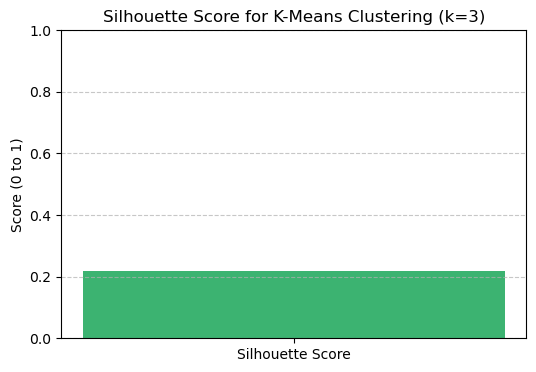

In [3]:
import matplotlib.pyplot as plt

# Bar plot to visualize the silhouette score
plt.figure(figsize=(6, 4))
plt.bar(['Silhouette Score'], [sil_score], color='mediumseagreen')
plt.ylim(0, 1)
plt.title('Silhouette Score for K-Means Clustering (k=3)')
plt.ylabel('Score (0 to 1)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 🧾 Conclusion

The silhouette score for the K-Means clustering result was **relatively low**. This confirms what we observed earlier in the paired scatter plots — there are **no clearly distinguishable groups** in the data.

Unlike supervised machine learning problems, real-world business data often lacks clean structure or naturally separated clusters. As such, **clustering results should always be interpreted in collaboration with domain experts** and considered as part of broader exploratory analysis rather than definitive answers.

Nonetheless, clustering can still provide valuable **insights for segmentation**, personalization, or identifying potential behavioral patterns.
___